### Defining the function

In [1]:
import numpy as np
import math

# This function creates 'same' pad if called. The default value vor padding is zero

def create_pad(image, k_size, value = 0):
    image_padded = value * np.ones((image.shape[0] + 2 * (k_size - int(np.round(k_size / 2))), 
                                    image.shape[1] + 2 * (k_size - int(np.round(k_size / 2)))))
    image_padded[k_size - int(np.round(k_size / 2)) : image.shape[0] + (k_size - int(np.round(k_size / 2))), 
                 k_size - int(np.round(k_size / 2)) : image.shape[1] + (k_size - int(np.round(k_size / 2)))] = image
    return image_padded

# The function takes as input the image on which filter must be applied, the number of filters, the kernel_size,
# The stripe and a boolean value for pad: if True 'same' pad will be used, otherwise 'valid'. The function
# return an array with the filters

def apply_filters(image, n_filters, k_size, stride, pad = True):
    
    if pad:
        image_ = create_pad(image, k_size)    
        output = []
        for n_filter in range(n_filters):
            filter_ = np.random.rand(k_size, k_size)
            filter_i = []
            for row in range(k_size - int(np.round(k_size / 2)), image.shape[0] + k_size - int(np.round(k_size / 2)), stride):
                row_pixel = []
                for col in range(k_size - int(np.round(k_size / 2)), image.shape[1] + k_size - int(np.round(k_size / 2)), stride):
        
                    pixel = np.dot(image_[row - math.floor(k_size / 2) : row + 1 + math.floor(k_size / 2), 
                                            col - math.floor(k_size / 2) : col + 1 + math.floor(k_size / 2)].reshape(k_size ** 2,),
                                   filter_.reshape(k_size ** 2,))
                    row_pixel.append(pixel)
                filter_i.append(row_pixel)
            output.append(filter_i)

    if not pad:
        output = []
        for n_filter in range(n_filters):
            filter_ = np.random.rand(k_size, k_size)
            filter_i = []
            for row in range(int(np.floor(k_size / 2)), image.shape[0] - int(np.floor(k_size / 2)), stride):
                row_pixel = []
                for col in range(int(np.floor(k_size / 2)), image.shape[0] - int(np.floor(k_size / 2)), stride):
                    pixel = np.dot(image[row - math.floor(k_size / 2) : row + 1 + math.floor(k_size / 2), 
                                     col - math.floor(k_size / 2) : col + 1 + math.floor(k_size / 2)].reshape(9,),
                                   filter_.reshape(9,))
                    row_pixel.append(pixel)
                filter_i.append(row_pixel)
        output.append(filter_i)
    return np.array(output)

### Importing fashion mnist dataset

In [2]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
image = X_train_full[1]

### Plotting generated filters

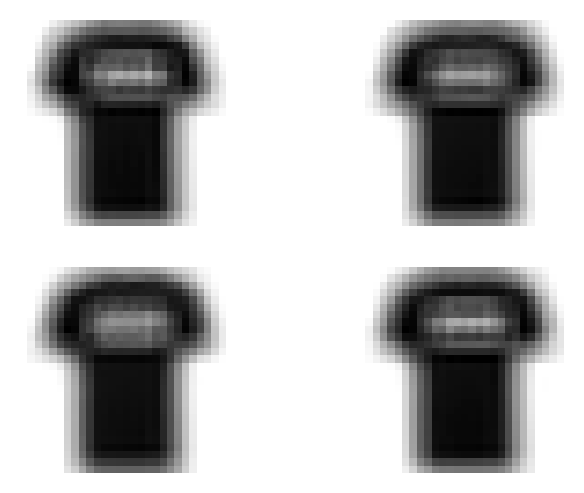

In [4]:
import matplotlib.pyplot as plt

filtered = apply_filters(image, n_filters = 4, k_size = 5, stride = 1)
fig = plt.figure(figsize = (4, 3), dpi = 200)
axes = {}
for i in range(1, 5):
    axes['ax' + str(i)] = fig.add_subplot(2, 2, i)
i = 1
for img in filtered:
    axes['ax' + str(i)].imshow(img, cmap = 'binary')
    axes['ax' + str(i)].axis('off')
    i += 1

As we can see each filter highlights a different part of the image, expecially on the t-shirt logo. If we apply filters in a recursive way we will end up in descovering very specific pattern within the image (i.e. vertical lines, edges, shapes ...)